<div style="text-align: right;font-weight:bold;font-size:large">Till Pfaff<br>3789265</div>

### 12. Monte Carlo simulations of the 1D Ising model
Write a Monte Carlo computer program for the simulation of the 1D
Ising model with $N = 20, 100, 1000,$ and $10000$ spins and free boundary
conditions. Use for the spin updates the Metropolis algorithm. Determine the mean energy, specific heat, magnetisation, and susceptibility for different temperatures in the inverse temperature range
$\beta = J \,/\, (k_B T ) = 0, ... , 2.$ Check your results by comparison with the
analytical results for the mean energy and specific heat of problem 1
respectively for $N = 20$ spins and all quantities by means of the exact
enumerations of problems 3 and 7.

Full code available at https://github.com/till-robert/cs1_seminar/tree/main/task12

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def avg_E_analytical(beta,N):
    J = 1
    return -(N-1) * J * np.tanh(beta*J)

def C_analytical(beta,N):
    J = 1
    k = 1
    return (N-1) * J**2 * k * beta**2 / (np.cosh(beta*J)**2)

In [3]:
omega = np.loadtxt("../task07/out/omega.txt").T #Ω(E,M)

E_counted = np.arange(-19,20,2)
M_counted = np.arange(-20,21,2)

def Z(beta):
    return np.sum(omega * np.exp(-beta*E_counted))
def avg_E_counted(beta):
    return 1/Z(beta) * np.sum(np.sum(omega,axis=0) * E_counted * np.exp(-beta*E_counted))
def avg_M_counted(beta):
    return 1/Z(beta) * np.sum(np.sum(omega.T * M_counted) *  np.exp(-beta*E_counted))
def avg_E_counted_sq(beta):
    return 1/Z(beta) * np.sum(np.sum(omega,axis=0) * E_counted**2 * np.exp(-beta*E_counted))
def avg_M_counted_sq(beta):
    return 1/Z(beta) * np.sum(np.sum(omega.T * M_counted**2) *  np.exp(-beta*E_counted))


C_counted = lambda beta: beta**2 *(avg_E_counted_sq(beta)-avg_E_counted(beta)**2)
chi_counted = lambda beta: beta * avg_M_counted_sq(beta)



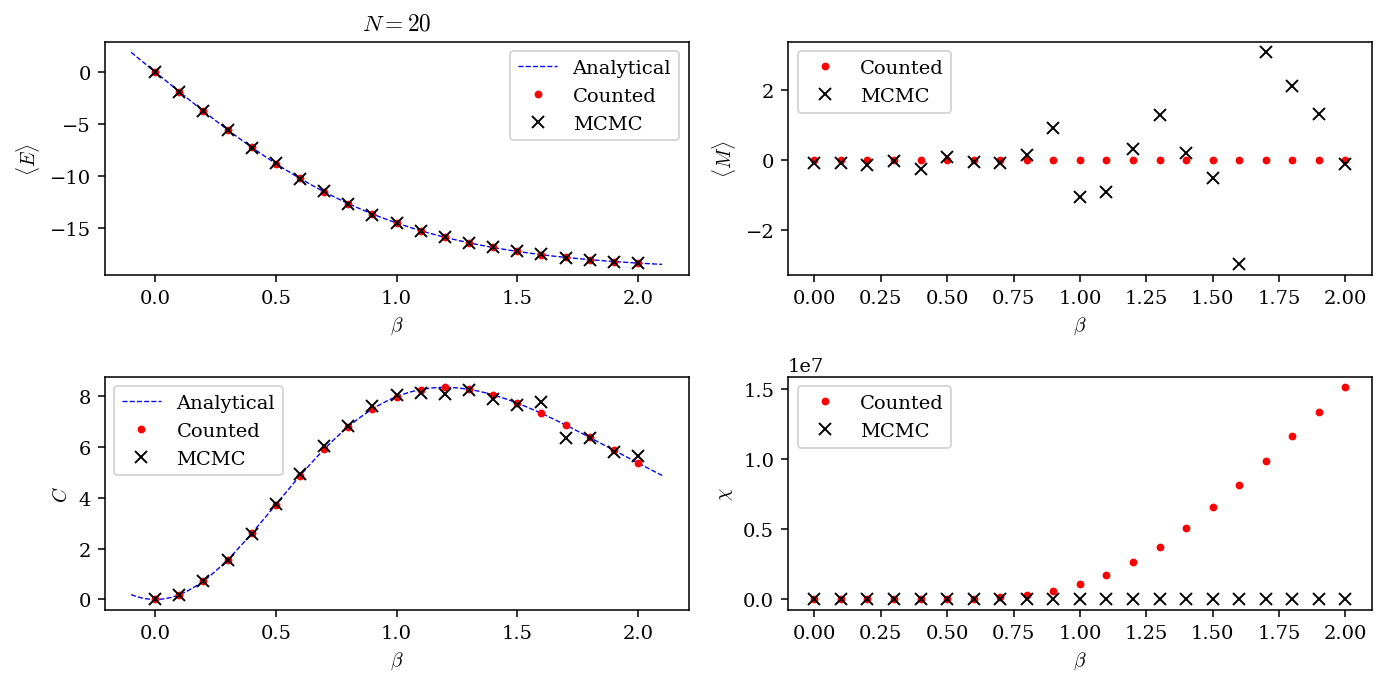

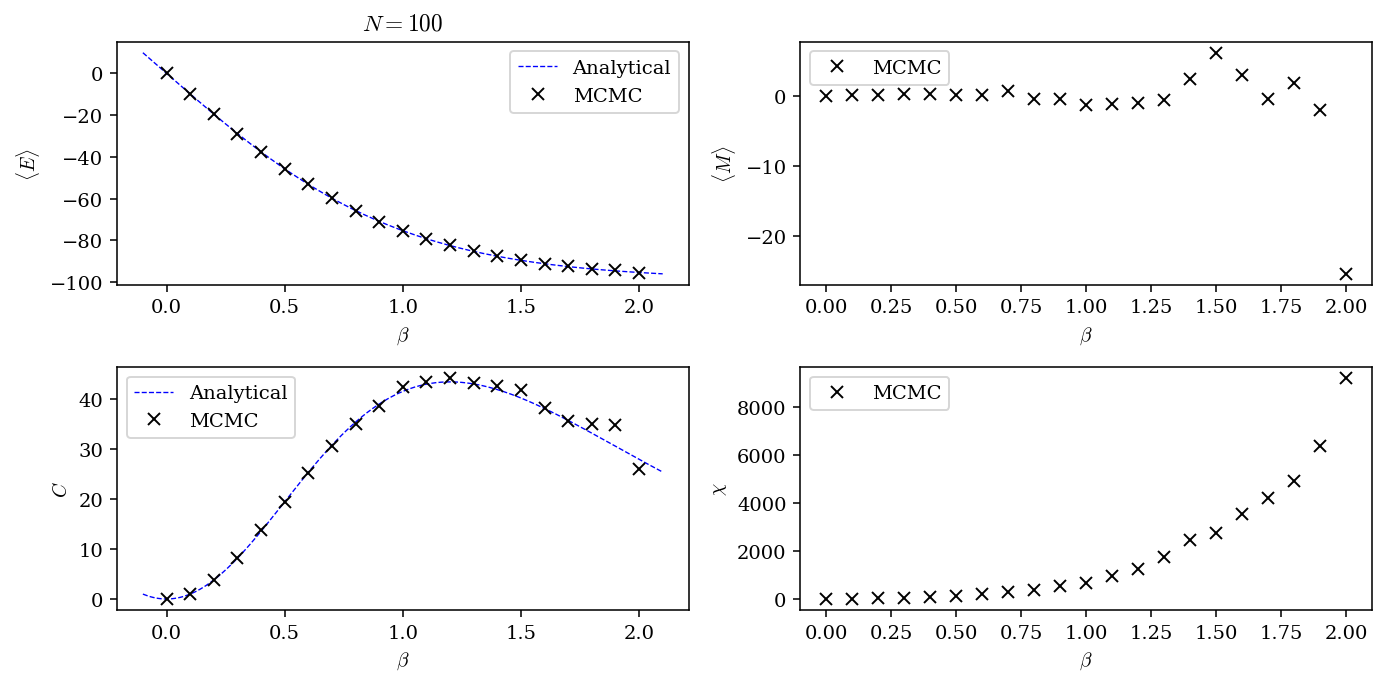

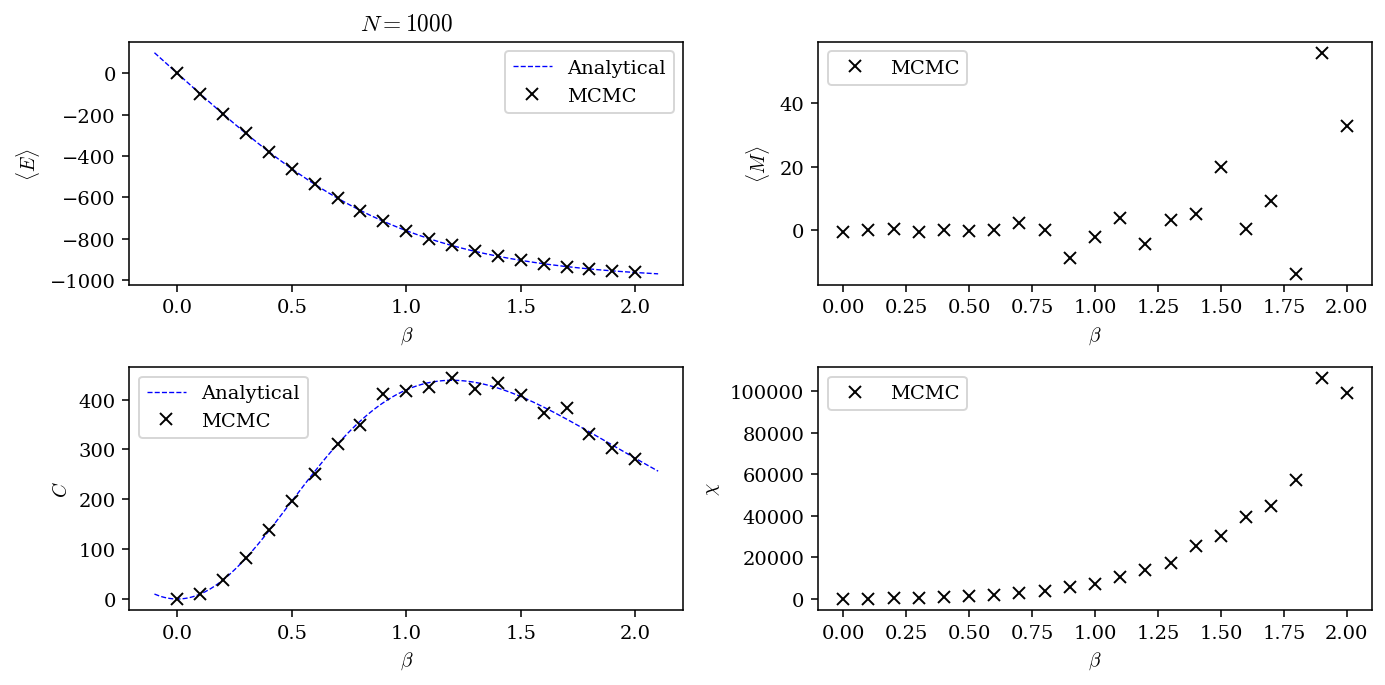

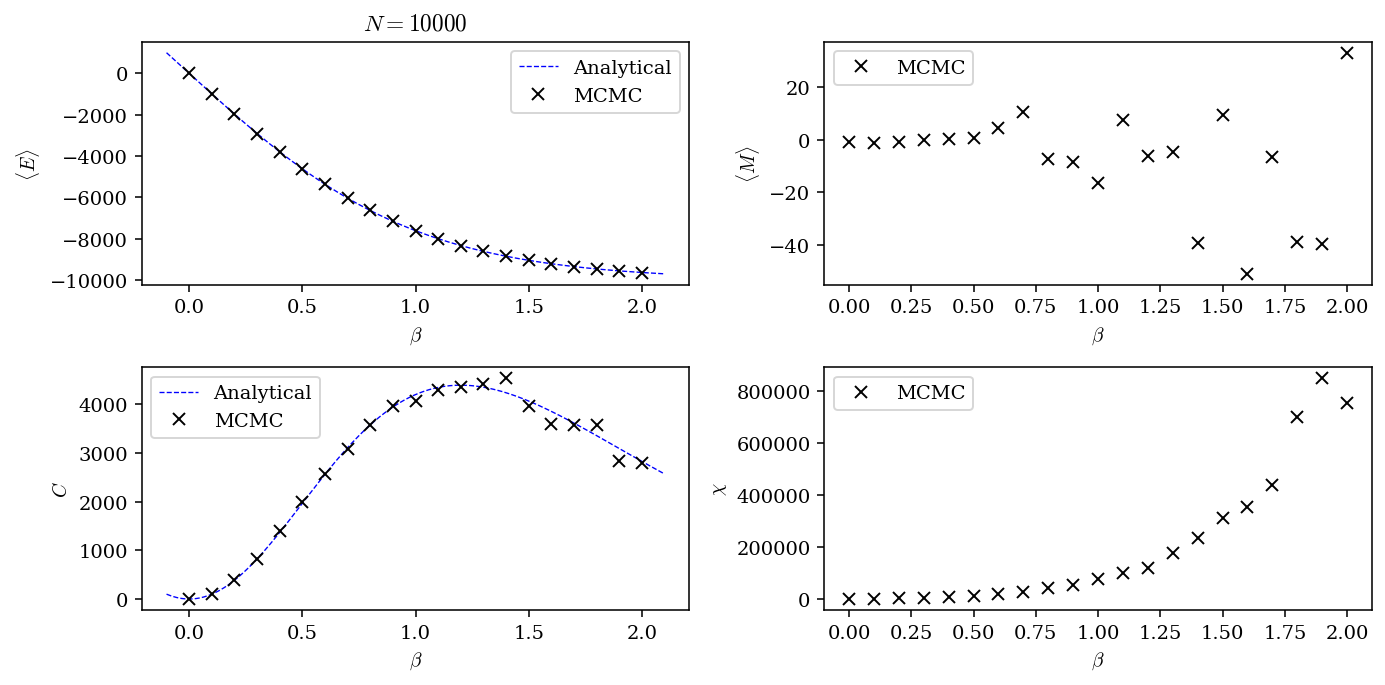

In [6]:
N_spins_arr = np.array([20,100,1000,10000])
beta_range = np.linspace(-0.1,2.1,200)


for i,N_spins in enumerate(N_spins_arr):
    beta, E_J, M,C,chi = np.loadtxt(f"out/{N_spins}.txt").T
    plt.figure(figsize=(10, 5))

    plt.subplot(2,2,1)
    plt.title(r"$N = " + str(N_spins) + r"$")
    plt.ylabel(r"$\langle E\rangle$")
    plt.xlabel(r"$\beta$")
    plt.plot(beta_range, avg_E_analytical(beta_range,N_spins), "b--", lw=0.7, label="Analytical")
    if(N_spins == 20):
         plt.plot(beta, [avg_E_counted(beta_val) for beta_val in beta], "r.", lw=0.7, label="Counted")
    plt.plot(beta,E_J,"kx", label="MCMC")
    plt.legend()
    # plt.axvline(measure,ymin=0,ymax=1,color="orange",ls="dashed")
    plt.subplot(2,2,2)
    plt.ylabel(r"$\langle M\rangle$")
    plt.xlabel(r"$\beta$")
    if(N_spins == 20):
        plt.plot(beta, [avg_M_counted(beta_val) for beta_val in beta], "r.", lw=0.7, label="Counted")
    plt.plot(beta,M,"kx", label="MCMC")
    plt.legend()

    plt.subplot(2,2,3)
    plt.ylabel(r"$C$")
    plt.xlabel(r"$\beta$")
    plt.plot(beta_range, C_analytical(beta_range,N_spins), "b--", lw=0.7, label="Analytical")
    if(N_spins == 20):
        plt.plot(beta, [C_counted(beta_val) for beta_val in beta], "r.", lw=0.7, label="Counted")
    plt.plot(beta,C, "kx",label="MCMC")
    plt.legend()

    plt.subplot(2,2,4)
    plt.ylabel(r"$\chi$")
    plt.xlabel(r"$\beta$")
    if(N_spins == 20):
        plt.plot(beta, [chi_counted(beta_val) for beta_val in beta], "r.", lw=0.7, label="Counted")
    plt.plot(beta,chi,"kx", label="MCMC")
    plt.legend()

    plt.show()
